### 190234E HEWASURA G.I.

### EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering

### (01)

([], [])

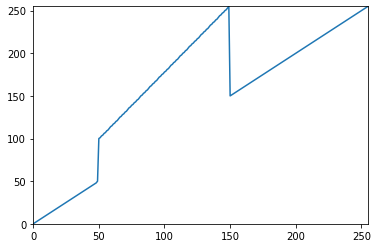

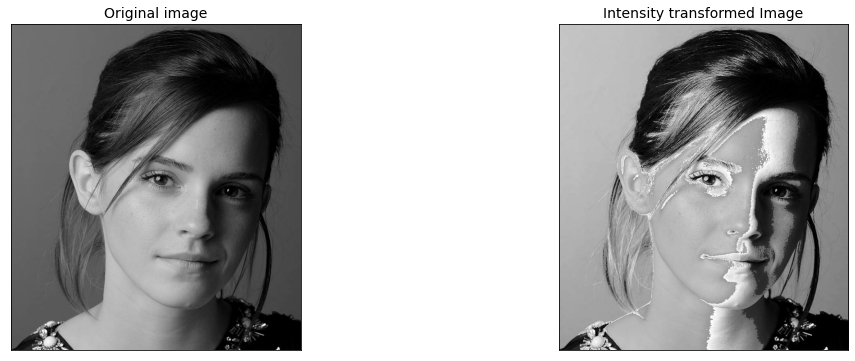

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)

plt.plot(t)
plt.xlim(0,255)
plt.ylim(0,255)

g = cv.LUT(img ,t)
image = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(f, cmap='gray',vmin=0,vmax=255)
axes[0].set_title("Original image",fontsize = 14)
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image, cmap='gray')
axes[1].set_title('Intensity transformed Image',fontsize = 14)
axes[1].set_xticks([]), axes[1].set_yticks([])